# Final Project - ExoPlanet Classification
I have decided to have a go at an old Kaggle Competition, in the title.

I definitely want to revisit these technqiues in the future and this problem as DeepLearning seems to be the best implementation but I am struggling to find fun datasets to practice on. I am hoping to find some datasets within my workplace to practice these technqiues. 

https://github.com/Lorviina/MastersofScienceDataScience

In [1]:
# For numeric and data needs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## EDA

In [17]:
# Data
file_path = r'C:\Users\S1013521\OneDrive - Syngenta\2. Data Scientist\1. Masters of Science in Data Science\DTSA 5509 Introduction to Machine Learning\Week Six - Project\data'
exo_train = 'exoTrain.csv'
exo_test = 'exoTest.csv'

exo_train_path = os.path.join(file_path, exo_train)
exo_test_path = os.path.join(file_path, exo_test)

df_train = pd.read_csv(exo_train_path)
df_test = pd.read_csv(exo_test_path)
df_train.head()
len(df_train)
print(df_train.head())

   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08  

In [18]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64
LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64


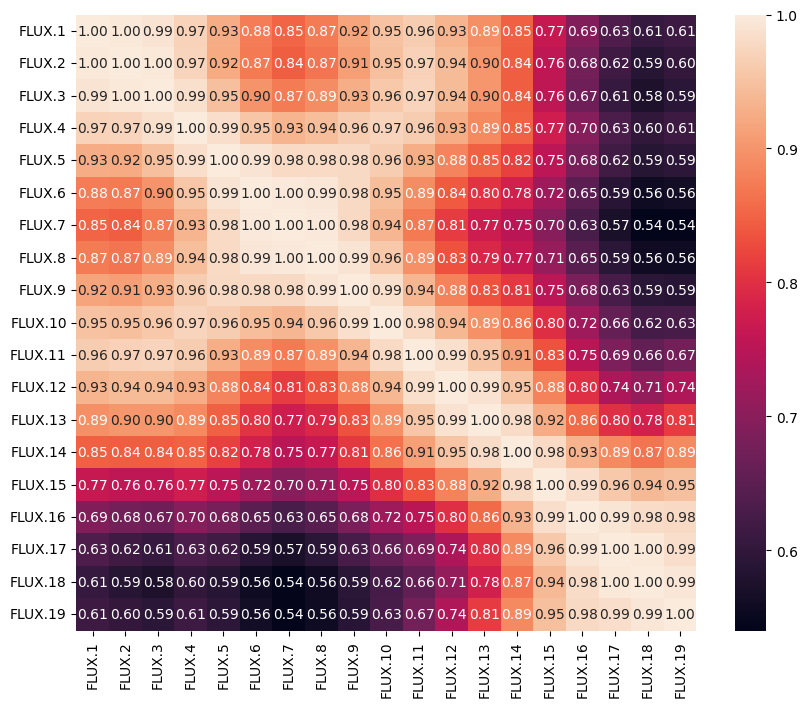

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.iloc[:, 1:20].corr(), annot=True, fmt=".2f")
plt.show()

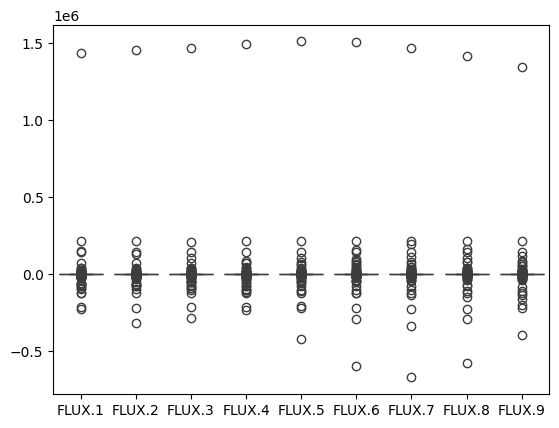

In [20]:
# Boxplot for outlier detection
sns.boxplot(data=df_train.iloc[:, 1:10])
plt.show()

## Feature Engineering

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

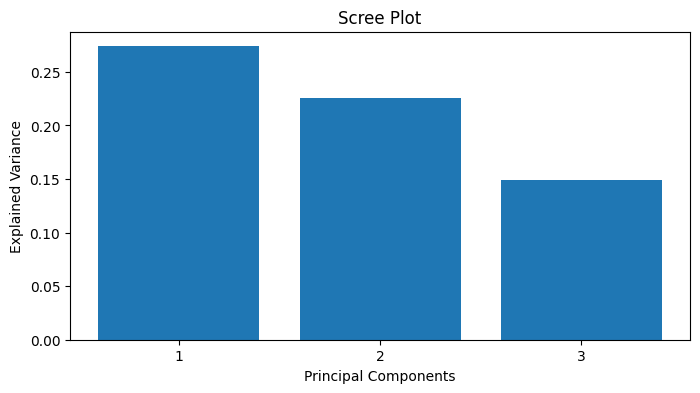

In [22]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.xticks([1, 2, 3])  # Adjust this based on the number of components
plt.show()

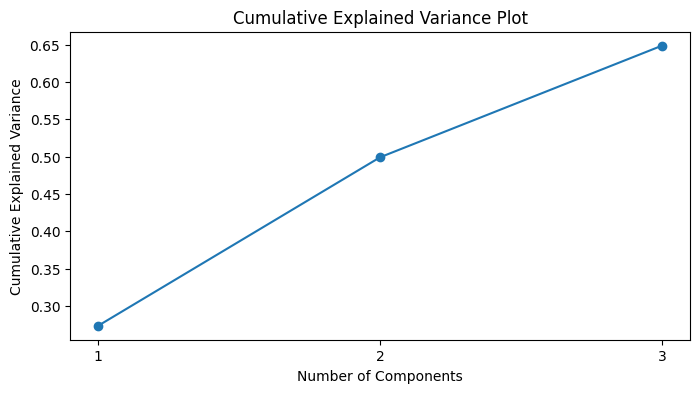

In [23]:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.xticks([1, 2, 3])  # Adjust based on the number of components
plt.show()

## Random Forest

In [26]:
from sklearn.model_selection import train_test_split
# Splitting the data into features and target
X = df_train.iloc[:, 1:]  # Assuming all other columns are features
y = df_train.iloc[:, 0]   # Assuming the first column is the target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9921414538310412
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1010
           2       0.00      0.00      0.00         8

    accuracy                           0.99      1018
   macro avg       0.50      0.50      0.50      1018
weighted avg       0.98      0.99      0.99      1018



C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


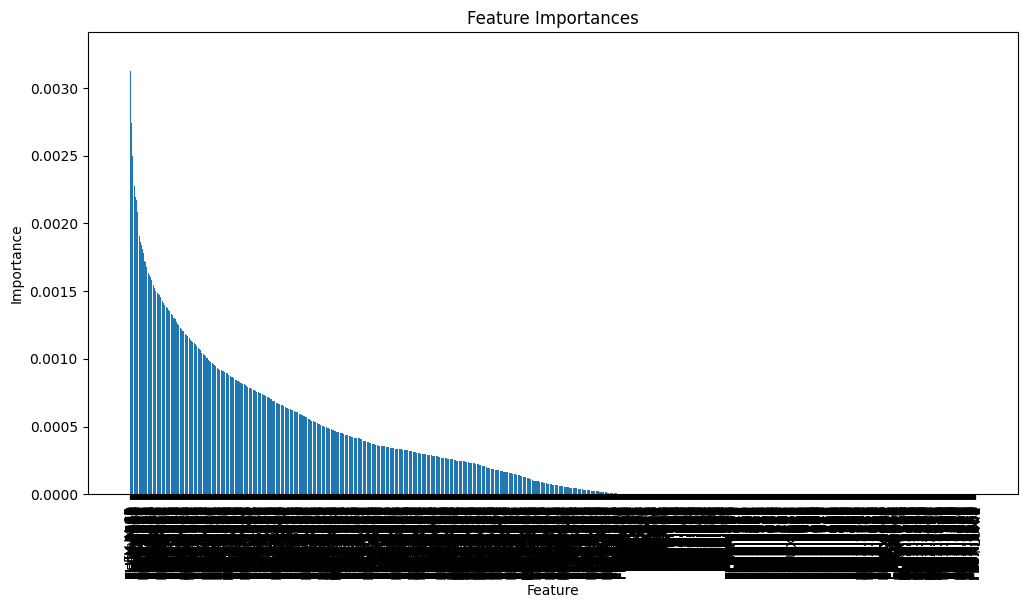

In [29]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Visualize the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Random Forest is struggling to pull apart the two labels. We need to balance the two calssifications.

In [30]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to generate synthetic samples for minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Re-train the RandomForest model with the balanced dataset
rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_resampled.fit(X_resampled, y_resampled)

# Predict on the original test set
y_pred_resampled = rf_resampled.predict(X_test)

# Evaluate the model
print("Accuracy after resampling:", accuracy_score(y_test, y_pred_resampled))
print(classification_report(y_test, y_pred_resampled))

Accuracy after resampling: 0.9911591355599214
              precision    recall  f1-score   support

           1       0.99      1.00      1.00      1010
           2       0.00      0.00      0.00         8

    accuracy                           0.99      1018
   macro avg       0.50      0.50      0.50      1018
weighted avg       0.98      0.99      0.99      1018



Even SMOTE cannot help with this technqiue.

## BACK TO PCA

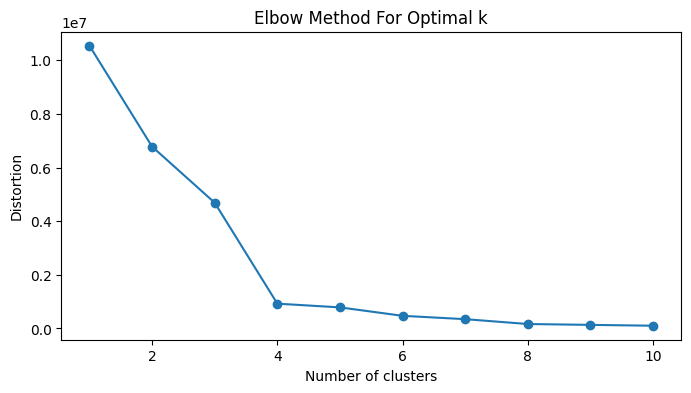

In [31]:
from sklearn.cluster import KMeans

# Calculate distortions for a range of number of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(principalDf)
    distortions.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

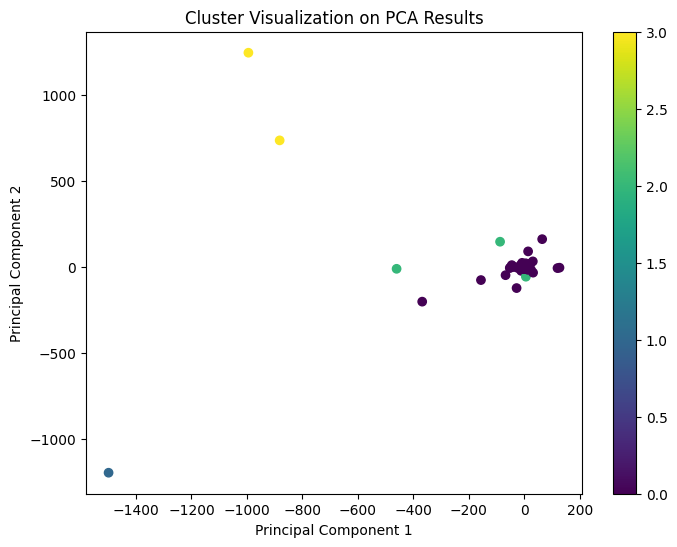

In [32]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(principalDf)

# Assign clusters to each data point
clusters = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principalDf['PC1'], principalDf['PC2'], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization on PCA Results')
plt.colorbar(scatter)
plt.show()